In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, classification_report
)


In [116]:
df = pd.read_csv('Datasets/Titanic-Dataset.csv')

In [117]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
df.shape

(891, 12)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [120]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [121]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [122]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\299957\AppData\Local\Temp\ipykernel_20472\3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [123]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\299957\AppData\Local\Temp\ipykernel_20472\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


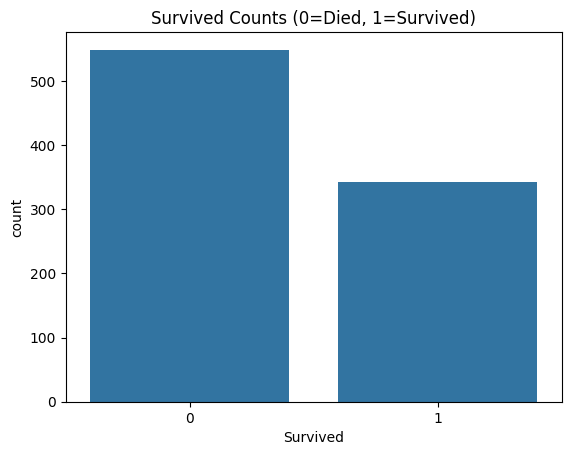

In [124]:
sns.countplot(x='Survived', data=df)
plt.title("Survived Counts (0=Died, 1=Survived)")
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

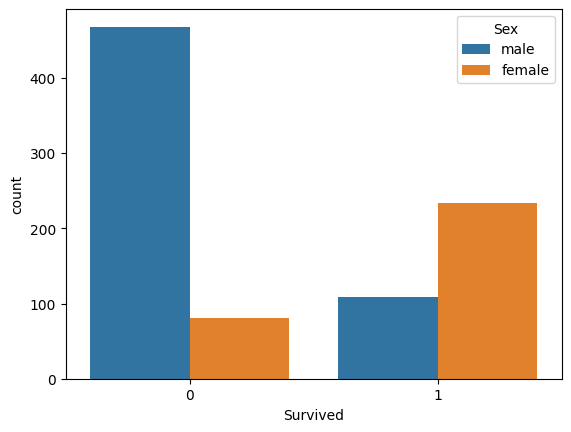

In [125]:
#survival by gender
sns.countplot(x='Survived', hue='Sex', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

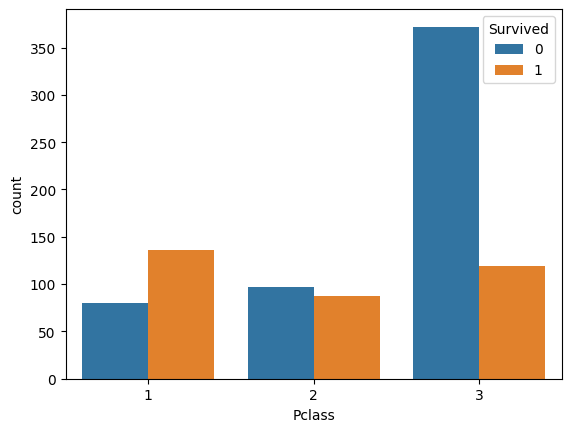

In [126]:
sns.countplot(x='Pclass', hue='Survived', data=df)

<Axes: xlabel='Age', ylabel='Count'>

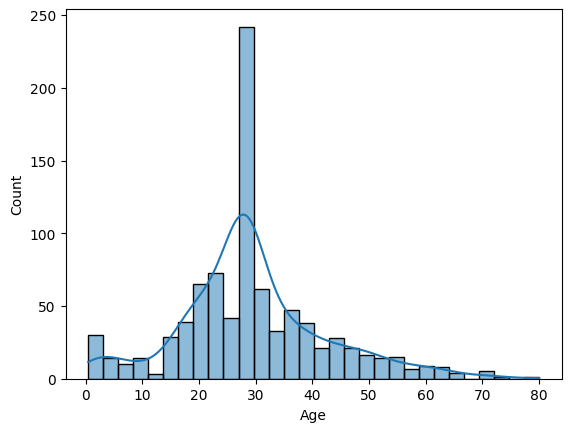

In [127]:
sns.histplot(x='Age', bins=30, kde=True, data=df)


<Axes: xlabel='Fare', ylabel='Count'>

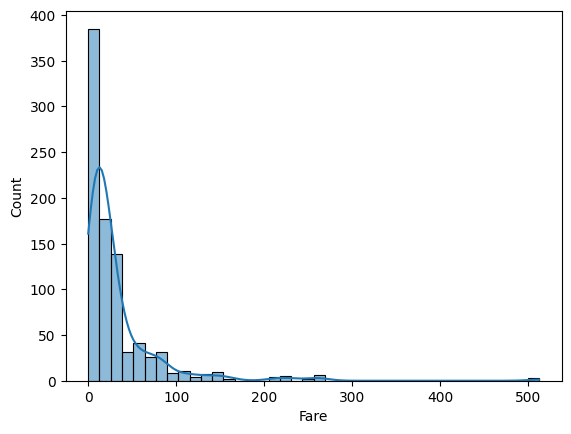

In [128]:
sns.histplot(x='Fare', bins=40, kde=True, data=df)


<Axes: xlabel='Survived', ylabel='count'>

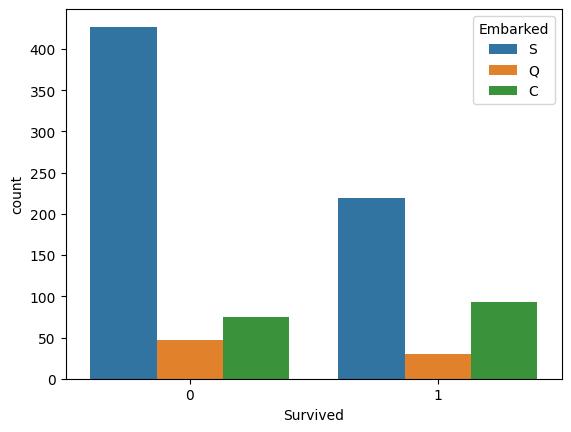

In [129]:
sns.countplot(x='Survived',hue='Embarked',data=df)

In [130]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [131]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
IsAlone          0
dtype: int64

In [132]:
df = df.drop(columns=["Cabin"])

In [133]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1


In [134]:
features = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "IsAlone"]
# X = df[features]
# y = df["Survived"]

In [135]:
print(df[categorical_features].head())
print(df[categorical_features].shape)


      Sex Embarked  IsAlone  Survived
0    male        S        0         0
1  female        C        0         1
2  female        S        1         1
3  female        S        0         1
4    male        S        1         0
(891, 4)


In [136]:
# Separate numeric and categorical
numeric_features = ["Pclass","Age", "Fare", "FamilySize"]
categorical_features = [ "Sex", "Embarked", "IsAlone","Survived"]

# num_imputer = SimpleImputer(strategy="median")
# df[numeric_features]=num_imputer.fit_transform(df[numeric_features])

# cat_imputer = SimpleImputer(strategy="most_frequent")
# df[categorical_features]= cat_imputer.fit_transform(df[categorical_features])



encoder=LabelEncoder()

df['Sex']=encoder.fit_transform(df['Sex'])
df['Embarked']=encoder.fit_transform(df['Embarked'])

df['IsAlone']=encoder.fit_transform(df['IsAlone'])



In [137]:
numerical_cols=["Pclass","Age", "Fare", "FamilySize"]
categorical_features = [ "Sex", "Embarked", "IsAlone","Survived"]

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,2,4,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0,1,1


In [138]:
df.drop(columns=['PassengerId','Ticket','Name','SibSp','Parch'],inplace=True)

In [139]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,0,3,1,22.0,7.2500,2,2,0
1,1,1,0,38.0,71.2833,0,2,0
2,1,3,0,26.0,7.9250,2,1,1
3,1,1,0,35.0,53.1000,2,2,0
4,0,3,1,35.0,8.0500,2,1,1


In [153]:
X=df.iloc[:,1:]
y=df.iloc[:,0]
y


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [143]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)


In [144]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,0,3,1,22.0,7.2500,2,2,0
1,1,1,0,38.0,71.2833,0,2,0
2,1,3,0,26.0,7.9250,2,1,1
3,1,1,0,35.0,53.1000,2,2,0
4,0,3,1,35.0,8.0500,2,1,1


In [148]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

model1=LogisticRegression()
model1.fit(X_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Accuracy: 0.7988826815642458
Precision: 0.7619047619047619
Recall: 0.6956521739130435
F1 Score: 0.7272727272727273

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



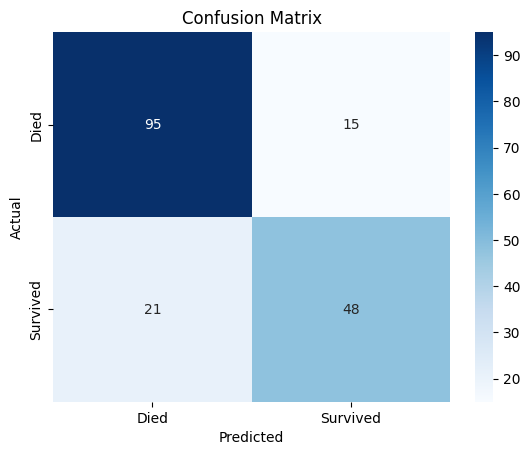

In [151]:
# Predictions
y_pred = model1.predict(X_test)

# Scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues',
            xticklabels=['Died','Survived'],
            yticklabels=['Died','Survived'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [154]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
y_pred2=tree.predict(X_test)

print("Accuracy: ", accuracy_score(y_test,y_pred2))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.7821229050279329
Confusion Matrix:  [[103   7]
 [ 32  37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179

